# Projet 4 : étude de santé publique

## Les données :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aideAlimentaire = pd.read_csv('aide_alimentaire.csv')
dispoAlimentaire = pd.read_csv('dispo_alimentaire.csv')
population = pd.read_csv('population.csv')
sousNutrition = pd.read_csv('sous_nutrition.csv')

In [3]:
#dispoAlimentaire.head()
# aideAlimentaire.head()
# population.head()
#sousNutrition.head()

### Les étapes de data préparation :

#### Gestion des valeurs <0.1 : 

In [4]:
TestValSignif = sousNutrition.loc[sousNutrition['Valeur'] == '<0.1', :]
TestValSignif['Zone'].unique()

array(['Arménie', 'Barbade', 'Belize', 'Cabo Verde',
       'Chine - RAS de Macao', 'Chypre', 'Dominique', 'Fidji', 'Guyana',
       'Îles Salomon', 'Kiribati', 'Macédoine du Nord', 'Maurice',
       'Nouvelle-Calédonie', 'Polynésie française',
       'Saint-Vincent-et-les Grenadines', 'Samoa', 'Sao Tomé-et-Principe',
       'Suriname', 'Trinité-et-Tobago', 'Vanuatu'], dtype=object)

In [5]:
list = ['Arménie', 'Barbade', 'Belize', 'Cabo Verde','Chine - RAS de Macao', 'Chypre', 'Dominique', 'Fidji', 'Guyana','Îles Salomon', 'Kiribati', 'Macédoine du Nord', 'Maurice','Nouvelle-Calédonie', 'Polynésie française','Saint-Vincent-et-les Grenadines', 'Samoa', 'Sao Tomé-et-Principe','Suriname', 'Trinité-et-Tobago', 'Vanuatu']
TestValSignif2 = population.loc[population['Zone'].isin(list), :]
TestValSignif2 = TestValSignif2.groupby(['Zone']).mean('Valeur')
TestValSignif2

,Année,Valeur
Zone,,
Arménie,2015.5,2928.038167
Barbade,2015.5,285.519167
Belize,2015.5,364.542333
Cabo Verde,2015.5,527.862167
Chine - RAS de Macao,2015.5,606.120333
Chypre,2015.5,1166.044333
Dominique,2015.5,71.279000
Fidji,2015.5,872.338167
Guyana,2015.5,769.282167


Seulement une vingtaine de localisations sont concernées et ces dernières font état d'une faible volume de population (entre 0,5 et 2 millions d'habitants), on va donc considérer que ces valeurs sont systématiquement égale a 0

#### Gestion des valeurs non renseignées : 

Utilisation de la fonction dropna afin de ne pas impacter les calculs avec des valeurs non renseignées

#### Gestion des plages de date (Dataframe sousNutrition) :

In [6]:
sousNutrition['Année'] = sousNutrition['Année'].str[5:]
sousNutrition['Année'] = sousNutrition['Année'].astype('int64')
sousNutrition['Année'] = sousNutrition['Année']-1

##  Etude sur la sous-nutrition dans le monde

### 1. La proportion de personnes en état de sous nutrition

In [7]:
# population par pays en 2017 uniquement (en millions)
pop2017 = population.loc[population['Année'] == 2017, :]
pop2017 = round(pop2017.sum()['Valeur']/1000)
print("La population totale en 2017 etait de",pop2017,"millions de personnes")

La population totale en 2017 etait de 7548 millions de personnes


In [8]:
#Population en état de sous nutrition en 2017 en millions
malNutrition2017 = sousNutrition.loc[sousNutrition['Année'] == 2017, :].copy()
malNutrition2017.head()
malNutrition2017.loc[malNutrition2017['Valeur']=='<0.1','Valeur']= 0
malNutrition2017.dropna(inplace=True)
malNutrition2017 = malNutrition2017.astype({'Valeur' : np.float64})
malNutrition2017 = malNutrition2017.sum()['Valeur']
print("Le nombre de personnes en etat de mal nutrition en 2017 etait de",malNutrition2017,"millions de personnes")

Le nombre de personnes en etat de mal nutrition en 2017 etait de 535.7 millions de personnes


In [9]:
# calcul de la proportion de personnes en état de sous nutrition
popSousNut = round(malNutrition2017 / pop2017 *100,3)
print( "En 2017, on dénombre environ", malNutrition2017, "millions de personnes en état de sous nutrition pour une population totale d'environ", pop2017,"millions de personnes.") 
print( "On peut donc affirmer qu'environ 1 personne sur 15 etait en état de sous nutrition sur cette période (soit", popSousNut, "%)")

En 2017, on dénombre environ 535.7 millions de personnes en état de sous nutrition pour une population totale d'environ 7548 millions de personnes.
On peut donc affirmer qu'environ 1 personne sur 15 etait en état de sous nutrition sur cette période (soit 7.097 %)


### 2. le nombre théorique de personnes qui pourraient être nourries

La disponibilité alimentaire correspond à la disponibilité d'aliments en quantité suffisante et
d'une qualité appropriée pour l’alimentation humaine.

Une personne a besoin de 2500 kcal par jours pour se nourir convenablement

In [10]:
dispoAlimentaire['Produit'].unique() # on vérifie que le data frame ne comprenne que des produits comestibles par l'Homme

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [11]:
# création d'un data frame affichant la population (en milliers) par pays pour l'année 2017
pop2017 = population.loc[population['Année'] == 2017, :]
pop2017 = pop2017.rename(columns = {'Valeur' : 'Habitants'})
pop2017.head()

,Zone,Année,Habitants
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [12]:
dispoAlimentaire['Zone'].unique().shape #vérification du nombre de pays en amont de la fusion

(174,)

In [13]:
# fusion du df population 2017 avec le df Disponibilite alimentaire afin de pouvoir calculer la disponibilité alimentaire par pays, puis mondiale via un somme
dispoAlimentaireMond = pd.merge (dispoAlimentaire, pop2017, on=['Zone'], how='left')
dispoAlimentaireMond['dispo kcal'] = dispoAlimentaireMond['Disponibilité alimentaire (Kcal/personne/jour)'] * dispoAlimentaireMond['Habitants']*1000 *365
print ("La disponibilité mondiale totale en 2017 est de ", dispoAlimentaireMond['dispo kcal'].sum(), "kcal")

La disponibilité mondiale totale en 2017 est de  7635429388975815.0 kcal


In [14]:
dispoAlimentaireMond['Zone'].unique().shape #vérification du nombre de pays après la fusion -> OK

(174,)

In [15]:
# on vient ensuite calculer le nombre de personnes nourrissables en divisant la disponibilité mondiale en 2017 par le besoin annuel d'une personne pour avoir un volume de population nourrissable
hNourrissable = round(dispoAlimentaireMond['dispo kcal'].sum()/(2500*365))
# ce qui va nous permettre de calculer ensuite une proportion avec la population mondiale de la même année
proportion = round(hNourrissable /(pop2017['Habitants'].sum()*1000)*100,2).item()
print("En 2017, avec la disponibilité mondiale totale on aurait pu nourrir", hNourrissable, "personnes, soit", proportion , "% de la population totale")

En 2017, avec la disponibilité mondiale totale on aurait pu nourrir 8367593851 personnes, soit 110.86 % de la population totale


### 3. le nombre théorique de personnes qui pourraient être nourries uniquement sur la base de produits végétaux

In [16]:
#même logique que le calcul précédent mais en venant filtrer le df Disponibilité Alimentaire seulement sur les produits d'origine vegetale
dispoVege = dispoAlimentaire.loc[dispoAlimentaire['Origine'] == "vegetale", :] 
dispoVege = dispoVege.merge(population.loc[population['Année'] == 2017,['Zone', 'Valeur']], on='Zone')
dispoVege['dispo kcal'] = dispoVege['Disponibilité alimentaire (Kcal/personne/jour)'] * dispoVege['Valeur']*1000 *365
print ("La disponibilité mondiale de produits vegetaux en 2017 est de ", dispoVege['dispo kcal'].sum(), "kcal")

La disponibilité mondiale de produits vegetaux en 2017 est de  6300178937197865.0 kcal


In [17]:
hNourrissableVege = round(dispoVege['dispo kcal'].sum()/(2500*365))
proportion = round(hNourrissableVege/(pop2017['Habitants'].sum()*1000)*100,2).item()
print("En 2017, avec la disponibilité mondiale de produits vegetaux on aurait pu nourrir", hNourrissableVege, "personnes, soit", proportion , "% de la population totale")

En 2017, avec la disponibilité mondiale de produits vegetaux on aurait pu nourrir 6904305685 personnes, soit 91.47 % de la population totale


### 4. l’utilisation de la disponibilité intérieure, en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine. 

Il existe deux méthodes pour calculer la disponibilité intérieur :

**Production + Importations - Exportations + Variation de stock = Disponibilité Intérieur = Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations**

In [18]:
# test des deux methodes de calcul de la disponibilité intérieur
dispoIntMond = dispoAlimentaire.groupby(['Zone']).sum(numeric_only=True)
dispoIntMond['DispoIntCalcul1'] = dispoIntMond['Production'] + dispoIntMond['Importations - Quantité'] - dispoIntMond['Exportations - Quantité'] + dispoIntMond['Variation de stock']
dispoIntMond['DispoIntCalcul2'] = dispoIntMond['Semences'] + dispoIntMond['Pertes'] + dispoIntMond['Nourriture'] + dispoIntMond['Aliments pour animaux'] + dispoIntMond['Traitement'] + dispoIntMond['Autres Utilisations']
dispoIntMond.head()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,DispoIntCalcul1,DispoIntCalcul2
Zone,,,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0,13513.0,13511.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0,61259.0,61262.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0,4758.0,4754.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0,42628.0,42627.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0,162277.0,162332.0


On cherche a déterminer l’utilisation de la disponibilité intérieure et notamment :
- La part qui est attribuée à l’alimentation animale
- La part perdue
- La part concrètement utilisée pour l'alimentation humaine

##### Dispo intérieure mondiale annuelle d'aliments appropriés a l'humain en milliers de tonnes en 2013

In [19]:
# on viens simplement aditionner l'ensemble des valeurs de disponibilité intérieur pour en avoir le total en 2013
dispoIntMond = round(dispoAlimentaire.sum()['Disponibilité intérieure'])
print ("La disponibilité intérieur mondiale etait de",dispoIntMond, "milliers de tonnes en 2013")

La disponibilité intérieur mondiale etait de 9848994 milliers de tonnes en 2013


##### Part dédiée a la nourriture des animaux

In [20]:
# on viens filter le df dispo Alimentaire sur la typologie qui nous intéresse (ici Aliments pour animaux) pour ensuite pouvoir aditionner les volumes et comparer avec le total calculé juste au dessus
alimAnimale = dispoAlimentaire.loc[dispoAlimentaire['Aliments pour animaux'] > 0, :]
alimAnimale = alimAnimale.sum()['Aliments pour animaux']
propAlimAnimale = round(alimAnimale / dispoIntMond * 100,2)
print ("La part de la disponibilité intérieur mondiale dédiée a la nourriture des animaux en 2013 etait de",propAlimAnimale,"%")

La part de la disponibilité intérieur mondiale dédiée a la nourriture des animaux en 2013 etait de 13.24 %


##### Part perdue

In [21]:
pertes = dispoAlimentaire.loc[dispoAlimentaire['Pertes'] > 0, :]
pertes = pertes.sum()['Pertes']
propPertes = round(pertes / dispoIntMond * 100,2)
print ("La part de la disponibilité intérieur mondiale perdue en 2013 etait de",propPertes,"%")

La part de la disponibilité intérieur mondiale perdue en 2013 etait de 4.61 %


##### Part utilisée pour l'alimentation humaine

In [22]:
alimHumaine = dispoAlimentaire.loc[dispoAlimentaire['Nourriture'] > 0, :]
alimHumaine = alimHumaine.sum()['Nourriture']
propAlimHumaine = round(alimHumaine / dispoIntMond * 100,2)
print ("La part de la disponibilité intérieur mondiale dédiée a la nourriture des hommes en 2013 etait de",propAlimHumaine,"%")

La part de la disponibilité intérieur mondiale dédiée a la nourriture des hommes en 2013 etait de 49.51 %


##  Questions de Mélanie

### 1. Pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [23]:
# data frame sous nutrition filtré sur 2017
sousNut2017 = sousNutrition.loc[sousNutrition['Année'] == 2017, :].copy()
sousNut2017.dropna(inplace=True)
sousNut2017.rename(columns = {'Valeur':'Personnes sous alimentées'}, inplace = True)
sousNut2017.head()

,Zone,Année,Personnes sous alimentées
4,Afghanistan,2017,10.5
10,Afrique du Sud,2017,3.1
16,Albanie,2017,0.1
22,Algérie,2017,1.3
40,Angola,2017,5.8


In [24]:
# data frame population filtré sur 2017 (en millions d'habitants)
pop2017['Habitants'] = pop2017['Habitants'] /1000 
pop2017

,Zone,Année,Habitants
4,Afghanistan,2017,36.296113
10,Afrique du Sud,2017,57.009756
16,Albanie,2017,2.884169
22,Algérie,2017,41.389189
28,Allemagne,2017,82.658409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29.402484
1396,Viet Nam,2017,94.600648
1402,Yémen,2017,27.834819
1408,Zambie,2017,16.853599


In [25]:
# data frame population  & sous nutritions fusionnés + calcul de l'indicateur de proportion
propSousNut = pd.merge(pop2017, sousNut2017, on=['Zone','Année'], how='left')
propSousNut.loc[propSousNut['Personnes sous alimentées']=='<0.1','Personnes sous alimentées']= 0
propSousNut = propSousNut.astype({'Personnes sous alimentées' : np.float64})
propSousNut['Proportion de sous nutrition'] = round(propSousNut['Personnes sous alimentées'] / propSousNut['Habitants'] *100,2)
propSousNut.sort_values(by=['Proportion de sous nutrition'], ascending=False).head(10)

,Zone,Année,Habitants,Personnes sous alimentées,Proportion de sous nutrition
87,Haïti,2017,10.982366,5.3,48.26
181,République populaire démocratique de Corée,2017,25.429825,12.0,47.19
128,Madagascar,2017,25.570512,10.5,41.06
122,Libéria,2017,4.702226,1.8,38.28
119,Lesotho,2017,2.091534,0.8,38.25
216,Tchad,2017,15.016753,5.7,37.96
186,Rwanda,2017,11.980961,4.2,35.06
145,Mozambique,2017,28.649018,9.4,32.81
219,Timor-Leste,2017,1.243258,0.4,32.17
0,Afghanistan,2017,36.296113,10.5,28.93


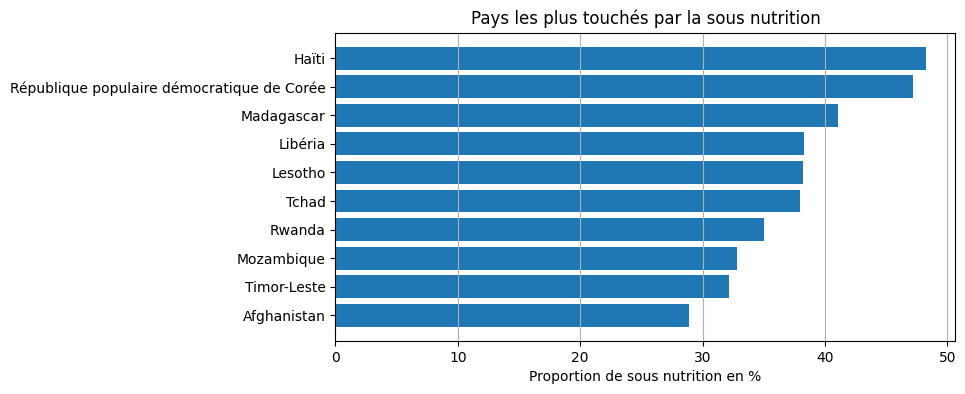

In [26]:
# mise en forme graphique via matplotlib
df_2017_top = propSousNut.loc[propSousNut['Personnes sous alimentées'] >= 0.1].sort_values(by=['Proportion de sous nutrition']).tail(10)
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 10})
plt.barh(df_2017_top['Zone'], df_2017_top['Proportion de sous nutrition'])
plt.title( "Pays les plus touchés par la sous nutrition")
plt.xlabel("Proportion de sous nutrition en %")
plt.grid(axis='x')

### 2. Pays ayant le plus bénéficié d'aides depuis 2013

In [27]:
#on défini notre plage de date puis on filtre le df Aides Alimentaires avec cette liste
plageDate = [2013, 2014, 2015, 2016, 2017]
aideAlimFrom2013 = aideAlimentaire.loc[aideAlimentaire ['Année'].isin(plageDate), :]
#on groupe le resultat par pays en aditionnant les valeurs (qui sont des milliers de tonnes d'aides reçues)
aideAlimFrom2013 = (aideAlimFrom2013.groupby(['Pays bénéficiaire']).sum(numeric_only=True)[['Valeur']]).reset_index()
# on vient renommer la colonne valeur pour une meilleur lisibilité
aideAlimFrom2013.rename(columns = {'Valeur':"Quantité d'aides touchées (Tonnes)"}, inplace = True)
# puis on vient trier pour n'afficher que les dix résultats les plus importants
aideAlimFrom2013 = aideAlimFrom2013.sort_values(by=["Quantité d'aides touchées (Tonnes)"], ascending=False)
aideAlimFrom2013.head(10)

,Pays bénéficiaire,Quantité d'aides touchées (Tonnes)
50,République arabe syrienne,1858943
75,Éthiopie,1381294
70,Yémen,1206484
61,Soudan du Sud,695248
60,Soudan,669784
30,Kenya,552836
3,Bangladesh,348188
59,Somalie,292678
53,République démocratique du Congo,288502
43,Niger,276344


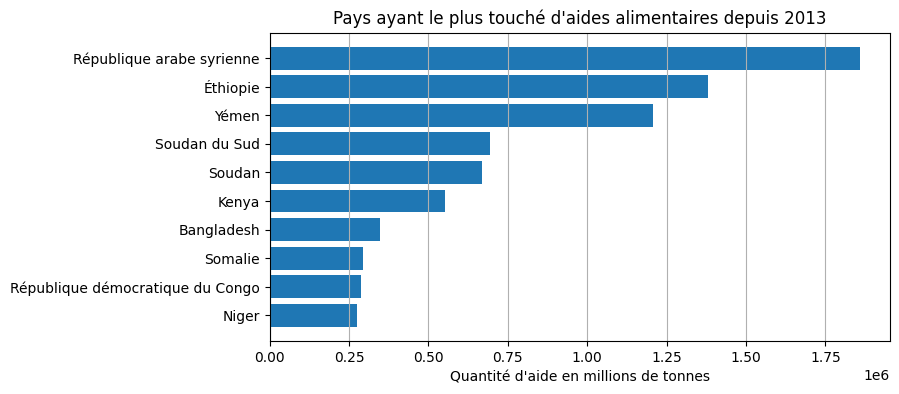

In [28]:
aideAlimFrom2013 = aideAlimFrom2013.sort_values(by=["Quantité d'aides touchées (Tonnes)"], ascending=True).tail(10)
plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 10})
plt.barh(aideAlimFrom2013["Pays bénéficiaire"], aideAlimFrom2013["Quantité d'aides touchées (Tonnes)"])
plt.title( "Pays ayant le plus touché d'aides alimentaires depuis 2013")
plt.xlabel("Quantité d'aide en millions de tonnes")
plt.grid(axis='x')

### 3. Pays ayant le plus de disponibilité par habitants & ceux en ayant le moins

In [29]:
# on vient grouper par pays en aditionnant les valeurs de disponibilité alimentaire 
dispoIntParPays = dispoAlimentaire.groupby(['Zone']).sum(numeric_only=True)[['Disponibilité alimentaire (Kcal/personne/jour)']]
dispoIntParPays.head()

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0


In [30]:
# on vient créer un dataframe avec le resultat du filtrage du df population sur l'année 2013
pop2013 = population.loc[population['Année'] == 2013, :]
pop2013 = round((pop2013.groupby('Zone').sum()[['Valeur']]) * 1000) #pour avoir la population en habitants
pop2013.rename(columns = {'Valeur': 'Population 2013'}, inplace = True)
pop2013.head()

,Population 2013
Zone,
Afghanistan,32269589.0
Afrique du Sud,53687121.0
Albanie,2903790.0
Algérie,38140133.0
Allemagne,81174367.0


In [31]:
#on fusionne nos deux data frames pour faire correspondre nos deux valeurs par pays (population & dispo alimentaire)
dispoHab = pd.merge(pop2013, dispoIntParPays, on=['Zone'], how='left')
#puis on vient trier pour avoir les dix prermiers pays
dispoHab.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=False).head(10)

,Population 2013,Disponibilité alimentaire (Kcal/personne/jour)
Zone,,
Autriche,8556189.0,3770.0
Belgique,11154009.0,3737.0
Turquie,75925462.0,3708.0
États-Unis d'Amérique,316400538.0,3682.0
Israël,7734841.0,3610.0
Irlande,4615422.0,3602.0
Italie,60166830.0,3578.0
Luxembourg,542560.0,3540.0
Égypte,88404646.0,3518.0


In [32]:
#même logique mais avec un tri pour afficher les dix dernier pays
dispoHab = pd.merge(pop2013, dispoIntParPays, on=['Zone'], how='left')
dispoHab.dropna(inplace=True)
dispoHab.sort_values(by=['Disponibilité alimentaire (Kcal/personne/jour)'], ascending=False).tail(10)

,Population 2013,Disponibilité alimentaire (Kcal/personne/jour)
Zone,,
Éthiopie,95385798.0,2129.0
Ouganda,35694519.0,2126.0
Zimbabwe,13350373.0,2113.0
Tchad,13220433.0,2109.0
République populaire démocratique de Corée,24929497.0,2093.0
Haïti,10400675.0,2089.0
Afghanistan,32269589.0,2087.0
Madagascar,22961255.0,2056.0
Zambie,14926544.0,1924.0


## Recherches de Julien

### 1. Utilisation des céréales

In [33]:
#on vient afficher la liste des produits afin d'en extraire seulement une liste de céréales
dispoAlimentaire['Produit'].unique() 

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

In [34]:
# on vient ensuite filtrer le df dispo Alimentaire avec cette liste de céréales
cereales = ['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho']
allocationCereales = dispoAlimentaire.loc[dispoAlimentaire['Produit'].isin(cereales), ('Produit','Aliments pour animaux', 'Nourriture')]
# on vient ensuite nettoyer la donnée afin de pouvoir calculer (suppression des valeurs vides + modification de type)
allocationCereales.dropna(inplace=True)
allocationCereales[['Aliments pour animaux', 'Nourriture']] = allocationCereales[['Aliments pour animaux', 'Nourriture']].astype('int64')
# on groupe les informations par type de céréale et on viens ajouter une ligne total pour plus de granularité et une meilleur lisibilité de l'information
allocationCereales = (allocationCereales.groupby('Produit').sum()[['Aliments pour animaux', 'Nourriture']])
allocationCereales.loc['Total']=allocationCereales.sum()
allocationCereales

,Aliments pour animaux,Nourriture
Produit,,
Avoine,16242,3203
Blé,129668,427573
"Céréales, Autres",19025,4760
Maïs,542233,123594
Millet,2640,20567
Orge,89836,5202
Riz (Eq Blanchi),33594,335914
Seigle,8091,5467
Sorgho,9164,20148


In [35]:
# calcul des proportions de cereales dédiée à la l'alimentation animale en comparaison de celle dédiée à la nourriture humaine
cerealesViande = dispoAlimentaire.loc[dispoAlimentaire['Produit'].isin(cereales)].sum()[['Aliments pour animaux']].values[0]
cerealesNourriture = dispoAlimentaire.loc[dispoAlimentaire['Produit'].isin(cereales)].sum()[['Nourriture']].values[0]
cerealesTotal = cerealesViande + cerealesNourriture
print("En 2013", round(cerealesViande/cerealesTotal*100,2),"% de la production mondiale de cereales était destinée a l'alimentation animale, contre",round(cerealesNourriture/cerealesTotal*100,2),"% dédiée directement à l'alimentation humaine")

En 2013 45.91 % de la production mondiale de cereales était destinée a l'alimentation animale, contre 54.09 % dédiée directement à l'alimentation humaine


La part de cereale employée pour la nourriture animale me semble très importante a la lumière de ce que j'ai pu constater au fil de l'analyse des données effectuée (notamment sur la sous nutrition de le monde), creusons en ce sens : 

In [36]:
# Part du vegetal et de l'animal dans la nourriture mondiale (au global)
nourritureAnimale = dispoAlimentaire.loc[dispoAlimentaire['Origine']== 'animale'].sum()[['Nourriture']].values[0]
nourritureVegetale = dispoAlimentaire.loc[dispoAlimentaire['Origine']== 'vegetale'].sum()[['Nourriture']].values[0]
nourritureTotale = dispoAlimentaire.sum()[['Nourriture']].values[0]

print("En effet, sur la même année, les produits d'origine animale représentaient seulement",round(nourritureAnimale/nourritureTotale*100,2),"% de la nourriture mondiale disponible, les",round(nourritureVegetale/nourritureTotale*100,2),"% restants etant issu du vegetal")


En effet, sur la même année, les produits d'origine animale représentaient seulement 24.28 % de la nourriture mondiale disponible, les 75.72 % restants etant issu du vegetal


**il semblerait donc que rentabilité alimentaire de la production de nourriture d'origine animale ne justifie pas une telle répartition de la production de céréales si on souhaite réduire la sous nutrition dans le monde**

En somme : allouer une plus faible quantité de cereales a la production de nourriture d'orgine animale afin d'employer le surplus dégagé directement en tant que nourriture pourrait être bénéfique pour l'humanité

### 2. Utilisation du manioc en Thaïlande

In [37]:
# on vient filtrer le df sousNutrition sur l'année 2013 et sur la Thaïlande uniquement
sousNutritionThai2013 = sousNutrition.loc[(sousNutrition['Année'] == 2013) & (sousNutrition['Zone'] == 'Thaïlande'),:].copy()
sousNutritionThai2013.rename(columns = {'Valeur':'Personnes sous alimentées'}, inplace = True)
# en parallèle on filtre le df dispoAlimentaire afin de n'avoir que des données concernant le Manioc sur le territoire Thaïlandais également
maniocThailande = dispoAlimentaire.loc[(dispoAlimentaire['Produit'] == 'Manioc') & (dispoAlimentaire['Zone'] == "Thaïlande"), ('Zone','Produit','Production','Exportations - Quantité')]
maniocThailande["Proportion d'exportation"] = round(maniocThailande['Exportations - Quantité'] / maniocThailande['Production'] * 100,2)
# enfin on vient fusionner ces deux df afin d'afficher dans un meme tableau l'ensemble des données pour pouvoir analyser
maniocThaiSousNut = pd.merge(maniocThailande, sousNutritionThai2013, on=['Zone'], how='left')
maniocThaiSousNut

,Zone,Produit,Production,Exportations - Quantité,Proportion d'exportation,Année,Personnes sous alimentées
0,Thaïlande,Manioc,30228.0,25214.0,83.41,2013,6.2


Malgré 6,2 millions de personnes en état de sous nutrition dans le pays, la Thaïlande continue d'exporter plus de 83% de sa production de manioc au lieu de s'en servir pour nourrir ses habitants